# MAE6592 Python Assignment: Part I

By Intelligent System Lab, University of Virginia


In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

This script imports three popular packages in python
1. numpy:  used to do scientific calculations
2. pandas: used to serve as database
3. pyplot: used to make charts

In [39]:
class serial_line:
    def __init__(self,cycle_time,buffer_capacity,buffer_initial=-1):
        """
        Arguments:
            cycle_time: the cycle time of each machine in minute, list or numpy array
            buffer_capacity: the maximum capacity of each buffer, list or numpy array
            buffer_initial: the initial buffer level of each buffer, zeros by default, list or numpy array
                            
        """
        self.M=len(cycle_time)                #length of the serial line
        self.ct=cycle_time                    #cycle time
        self.bc=buffer_capacity               #buffer capacity
        self.slowest=np.argmax(self.ct)       #find the slowest machine
        
        if buffer_initial==-1:
            self.bi=np.zeros(self.M-1)        #if initial buffer levels are not specified, start from zero
        else:
            self.bi=np.array(buffer_initial)  #initial buffer level
        
        """calculate buffer boundary"""
        self.beta=np.zeros((self.M,self.M))
        for i in range(self.M):
            for j in range(self.M):
                self.beta[i,j]=(sum(self.bc[i:j])-sum(self.bi[i:j]))\
                *(i<j)+sum(self.bi[j:i])*(i>j)

    def run(self,T,downtime,decimal=0):
        """
        Arguments:
            T: the total simulation time length in minute, int
            downtime: the downtime/ow you want to insert, tuple or list
                      ([[1st_timeofow,1st_durationofow],[2nd_timeofow,2nd_durationofow]]     #machine 1
                      [],                                                                    #machine 2, blank list if no ow inserted
                      ...,                                                                   #...
                      [[1st_timeofow,1st_durationofow]])                                     #machine M
            decimal: the decimals in the simulation time horizon, zero by default, int
        Return:
            stepwise buffer levels
            stepwise production counts
        """
        tpoints=T*(10**decimal)+1

        b=np.zeros((self.M-1,tpoints))         #buffer level
        b[:,0]=self.bi                         #initial buffer level
        pc=np.zeros((self.M,tpoints))          #production counts
        
        self.w=np.zeros((self.M,tpoints))      #generate downtime list according to downtime input
        for i in range(self.M):
            for j in downtime[i]:
                self.w[i,np.int(np.round(j[0]*(10**decimal))):\
                       np.int(np.round((j[0]+j[1])*(10**decimal)))]=1         #w=1 if the machine is down at the time step
        
        for t in range(1,tpoints):
            pc[:,t]=pc[:,t-1]+(1-self.w[:,t-1])/self.ct/(10**decimal)
            for i in range(self.M):
                temp=self.beta[i,:]+pc[:,t]
                pc[i,t]=np.min(temp)
            b[:,t]=pc[:self.M-1,t]-pc[1:,t]+self.bi                          #calculate buffer levels
        
        time=np.round(np.linspace(0,T,tpoints),decimals=decimal)             #generate time steps
        self.b=pd.DataFrame(b.T,
                            index=time,
                            columns=["B"+str(x) for x in range(2,self.M+1)]) #store results to pandas dataframe
        self.b=self.b.round(np.max((6,decimal)))                             #round results to remove numerical errors
        
        self.pc=pd.DataFrame(pc.T,
                             index=time,
                             columns=["M"+str(x) for x in range(1,self.M+1)])
        self.pc=self.pc.round(np.max((6,decimal)))
        
        return self.b,self.pc

The above codes construct a 'class' for the serial production line.
You are not required to understand and modify the above codes when finishing the assignment part 1.

In [40]:
"""Input parameters for assignment 1"""

"""Input cylce time (minunte)"""
cycle_time=[1/5,
            1/2,
            1/4,
            1/3]

"""Input maximum buffer capacities (parts)"""
buffer_capacity=[100,
                 200,
                 200]

"""Input initial buffer levels (parts)"""
buffer_initial=[50,
                100,
                100]

"""Input opportunity windows"""
tow1=0
pow1=1

"""Input simulation time length (minute)"""
T=8*60

### In assignment 1, you are not required to change the codes below this line

In [41]:
downtime=([[100,tow1*pow1]],
          [],
          [],
          [])

line1=serial_line(cycle_time,buffer_capacity,buffer_initial)     #construct serial production line with the given parameters
b,pc=line1.run(T,downtime,decimal=2)                             #run the serial production line and get results


In [42]:
print("\nProduction Count of Machine 1 =",pc.M1.iloc[-1])             #index -1 points to the last element
print("Production Count of Machine 2 =",pc.M2.iloc[-1])
print("Production Count of Machine 3 =",pc.M3.iloc[-1])
print("Production Count of Machine 4 =",pc.M4.iloc[-1],"\n")


Production Count of Machine 1 = 1010.0
Production Count of Machine 2 = 960.0
Production Count of Machine 3 = 1060.0
Production Count of Machine 4 = 1160.0 



In [43]:
print("\nBuffer Level of Buffer 2 at t = 100 mins =",b.B2[100])
print("Buffer Level of Buffer 3 at t = 100 mins =",b.B3[100])
print("Buffer Level of Buffer 4 at t = 100 mins =",b.B4[100],"\n")


Buffer Level of Buffer 2 at t = 100 mins = 100.0
Buffer Level of Buffer 3 at t = 100 mins = -0.0
Buffer Level of Buffer 4 at t = 100 mins = 100.0 



In [44]:
if pow1==1 and tow1==0:
    filenum="1"
elif pow1==1 and tow1!=0:
    filenum="2"
elif pow1==2 and tow1!=0:
    filenum="3"

<Figure size 432x288 with 0 Axes>

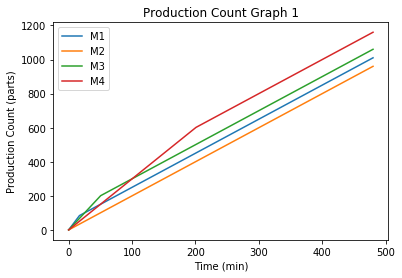

In [45]:
plt.figure()
pc.plot()
plt.ylabel("Production Count (parts)")
plt.xlabel("Time (min)")
plt.title("Production Count Graph "+filenum)
plt.savefig("PC"+filenum+".png",dpi=500)

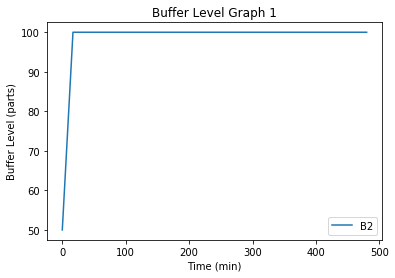

In [46]:
plt.figure()
b.B2.plot()
plt.legend(["B2"])
plt.ylabel("Buffer Level (parts)")
plt.xlabel("Time (min)")
plt.title("Buffer Level Graph "+filenum)
plt.savefig("BL"+filenum+".png",dpi=500)